## Imports

***

Let's import 3 packages which will be used throughout this notebook:

- [Pandas](https://pandas.pydata.org/docs/index.html) enables us to load tabular data (such as a csv file) as a Data Frame and perform analysis on the data.
- [Numpy](https://numpy.org/) enables us to store data as arrays and process these in a performant manner.
- [Matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) enables us to create visualizations such as bar charts, histograms and scatterplots.

In [1]:
# Import pandas, matplotlib.pyplot and numpy packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data & Data Overview

***

The [UCI machine learning repository](https://archive.ics.uci.edu/dataset/53/iris) does not come in the easiest format to interact with the data. Instead we have downloaded a copy of the data set from the [Seaborn repository](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv).

In [3]:
# Create a pandas DataFrame from the iris.csv file (sourced from the Seaborn Repository linked above).
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv
df = pd.read_csv('iris.csv')

The data is now loaded and we can generate an overview by printing the Data Frame to our console. (The Data Frame is truncated to display the first 5 and last 5 records)

In [16]:
# Let's have an initial look. 
# https://pandas.pydata.org/docs/user_guide/dsintro.html#console-display
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We can see from the above table there are 150 rows (records), each representing an individual flower, and 5 columns (variables). Of the 5 columns, 1 is categorical (species) and the rest are numeric. Next, let's generate descriptive statistics on the data set, and print a concise summary of each variable to a single text file.

In [22]:
# Describe the data set.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df_desc = df.describe(include='all')
df_desc

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
df_desc

In [20]:
# Return information about the data.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Two Variable Plots

***

In [6]:
# Get just the petal lengths.
plen = df['petal_length']

# Show.
print(plen)

# Type.
print(type(plen))

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64
<class 'pandas.core.series.Series'>


In [7]:
# Just get thge numpy array.
plen.to_numpy()

# Show.
plen

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [8]:
# Get just the petal widths.
pwidth = df['petal_width'].to_numpy()

# Show.
pwidth

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

(0.0, 4.0)

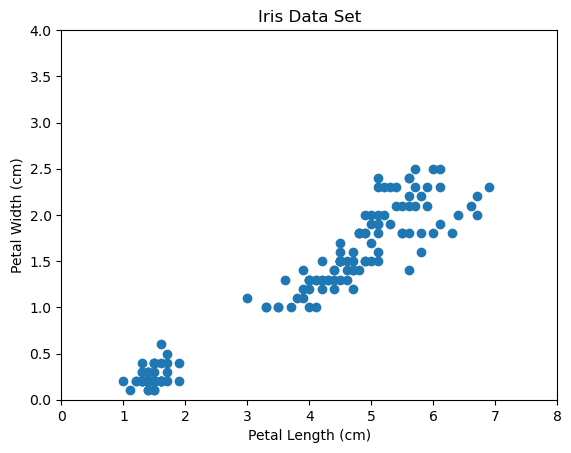

In [9]:
# Simple plot.
plt.plot(plen, pwidth, 'o')

# Axis labels.
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Title.
plt.title('Iris Data Set')

# X limits.
plt.xlim(0, 8)

# Y limits.
plt.ylim(0, 4)

(0.0, 4.0)

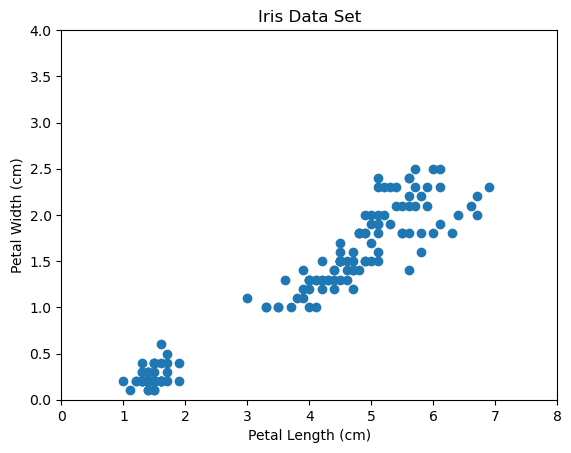

In [10]:
# Create a new figure and set of axes.
fig, ax = plt.subplots()

# Simple plot.
ax.plot(plen, pwidth, 'o')

# Axis labels.
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

# Title.
ax.set_title('Iris Data Set')

# X limits.
ax.set_xlim(0, 8)

# Y limits.
ax.set_ylim(0, 4)

## Add a Best Fit Line

***

$ y = mx + c = p_1 x^1 + p_0 = p_1x + p_0 $

In [11]:
# Fit a straight line between x and y.
m, c = np.polyfit(plen, pwidth, 1)

# Show m and c.
m, c

(0.4157554163524116, -0.3630755213190288)

(0.0, 4.0)

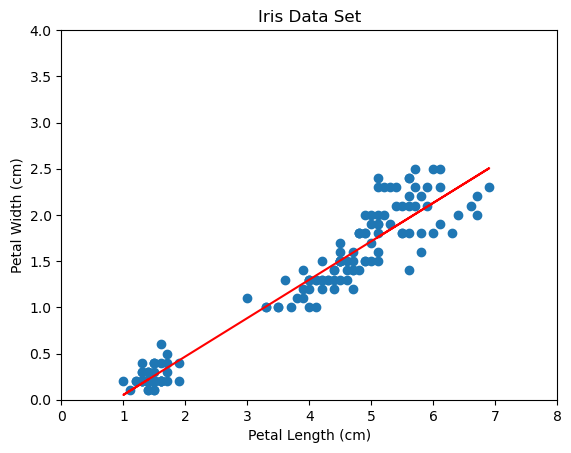

In [12]:
# Create a new figure and set of axes.
fig, ax = plt.subplots()

# Simple plot.
ax.plot(plen, pwidth, 'o')

# Simple plot.
ax.plot(plen, m * plen + c, 'r-')

# Axis labels.
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

# Title.
ax.set_title('Iris Data Set')

# X limits.
ax.set_xlim(0, 8)

# Y limits.
ax.set_ylim(0, 4)

In [13]:
# x values for best fit line.
bf_x = np.linspace(0.0, 8.0, 100)

# y values for best fit line.
bf_y = m * bf_x + c

(-1.0, 4.0)

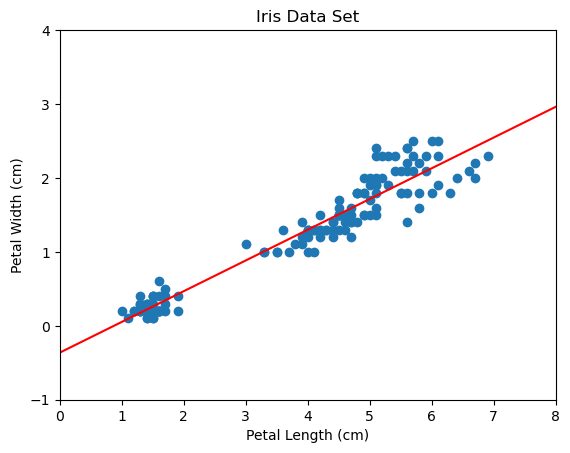

In [14]:
# Create a new figure and set of axes.
fig, ax = plt.subplots()

# Simple plot.
ax.plot(plen, pwidth, 'o')

# Simple plot.
ax.plot(bf_x, bf_y, 'r-')

# Axis labels.
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

# Title.
ax.set_title('Iris Data Set')

# X limits.
ax.set_xlim(0, 8)

# Y limits.
ax.set_ylim(-1, 4)

In [15]:
# Measure the correlation.
np.corrcoef(plen, pwidth)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

## End

***